# BÀI THỰC HÀNH 3: MẠNG NEURAL HỒI QUY CHO BÀI TOÁN PHÂN LOẠI VĂN BẢN VÀ GÁN NHÃN CHUỖI

<b>Hướng dẫn nộp bài:</b> Các bạn commit và push code lên github, sử dụng file txt đặt tên theo cú pháp <MSSV>.txt chứa đường link dẫn đến github của bài thực hành và nộp file txt này tên courses.

Bộ dữ liệu sử dụng: [UIT-VSFC](https://drive.google.com/drive/folders/1rdcXNGt_3-QUvV8EtSvVsLMVeHmk6Yqk?usp=drive_link) và [PhoNERT](https://github.com/VinAIResearch/PhoNER_COVID19).

### Bài 1: Xây dựng mạng LSTM gồm 5 lớp với hidden size là 256 cho bài toán phân loại văn bản. Huấn luyện mô hình này trên bộ dữ liệu UIT-VSFC (Vietnamese Student Feedback Corpus) sử dụng Adam làm phương thức tối ưu tham số và đánh giá độ hiệu quả của mô hình sử dụng độ đo F1.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/Uni/Ki-5-Nam-3/DS201/Lab-3")

In [ ]:
gdown.download_folder(url="https://drive.google.com/drive/folders/1rdcXNGt_3-QUvV8EtSvVsLMVeHmk6Yqk", output="dataset", quiet=False)

Retrieving folder contents


Processing file 1UWbzHFeUPu4AuofOEy0Fo0SFotVZHzUe UIT-VSFC-dev.json
Processing file 1g4imdabNbswIu91K6zKFGalkjDBBqaQq UIT-VSFC-test.json
Processing file 1eJdEStCQBf3GtbOIQfIR2iS-Wb3nlfJX UIT-VSFC-train.json


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1UWbzHFeUPu4AuofOEy0Fo0SFotVZHzUe
To: /content/drive/MyDrive/Uni/Ki-5-Nam-3/DS201/Lab-3/dataset/UIT-VSFC-dev.json
100%|██████████| 274k/274k [00:00<00:00, 54.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1g4imdabNbswIu91K6zKFGalkjDBBqaQq
To: /content/drive/MyDrive/Uni/Ki-5-Nam-3/DS201/Lab-3/dataset/UIT-VSFC-test.json
100%|██████████| 559k/559k [00:00<00:00, 75.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eJdEStCQBf3GtbOIQfIR2iS-Wb3nlfJX
To: /content/drive/MyDrive/Uni/Ki-5-Nam-3/DS201/Lab-3/dataset/UIT-VSFC-train.json
100%|██████████| 2.02M/2.02M [00:00<00:00, 166MB/s]
Download completed


['dataset/UIT-VSFC-dev.json',
 'dataset/UIT-VSFC-test.json',
 'dataset/UIT-VSFC-train.json']

In [3]:
%run config.py

---KIỂM TRA CẤU HÌNH---
Device: cuda
Số lớp LSTM: 5
Hidden size: 256
Embedding dim: 300
Số classes: 4
Labels: ['training_program', 'lecturer', 'others', 'facility']
Batch size: 32
Learning rate: 0.001
Max sequence length: 128
Bidirectional model: True
% Drop out: 0


[INFO] Bắt đầu xây dựng vocab
[INFO] Xây dựng hoàn tất. Vocab size: 1535

[INFO] Load dataset
[INFO] Load dataset/UIT-VSFC-train.json thành công. Kích thước: 11426 
Phân bố nhãn: {'training_program': 2201, 'lecturer': 8166, 'others': 562, 'facility': 497}
[INFO] Load dataset/UIT-VSFC-dev.json thành công. Kích thước: 1583 
Phân bố nhãn: {'training_program': 267, 'lecturer': 1151, 'others': 95, 'facility': 70}
[INFO] Load dataset/UIT-VSFC-test.json thành công. Kích thước: 3166 
Phân bố nhãn: {'lecturer': 2290, 'training_program': 572, 'others': 159, 'facility': 145}

[INFO] Khởi tạo mô hình

[INFO] Huấn luyện mô hình
---BẮT ĐẦU TRAINING---
Số epoch: 10
Batch size: 32
--------------------
Epoch 1/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 139.77it/s]


Train Loss: 0.4486 | Train F1: 0.6414
Dev Loss: 0.3593 | Dev F1: 0.7563
--------------------
Epoch 2/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 139.64it/s]


Train Loss: 0.3349 | Train F1: 0.7646
Dev Loss: 0.3592 | Dev F1: 0.7331
--------------------
Epoch 3/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 97.04it/s]


Train Loss: 0.2802 | Train F1: 0.8185
Dev Loss: 0.3838 | Dev F1: 0.7387
--------------------
Epoch 4/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 140.52it/s]


Train Loss: 0.2330 | Train F1: 0.8546
Dev Loss: 0.3757 | Dev F1: 0.7483
--------------------
Epoch 5/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 140.34it/s]


Train Loss: 0.1918 | Train F1: 0.8799
Dev Loss: 0.4246 | Dev F1: 0.7394
--------------------
Epoch 6/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 141.83it/s]


Train Loss: 0.1506 | Train F1: 0.9050
Dev Loss: 0.4499 | Dev F1: 0.7479
--------------------
Epoch 7/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 138.82it/s]


Train Loss: 0.1120 | Train F1: 0.9337
Dev Loss: 0.4954 | Dev F1: 0.7464
--------------------
Epoch 8/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 142.19it/s]


Train Loss: 0.0962 | Train F1: 0.9408
Dev Loss: 0.4922 | Dev F1: 0.7395
--------------------
Epoch 9/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 105.84it/s]


Train Loss: 0.0767 | Train F1: 0.9528
Dev Loss: 0.5872 | Dev F1: 0.7497
--------------------
Epoch 10/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 141.18it/s]


Train Loss: 0.0630 | Train F1: 0.9618
Dev Loss: 0.6137 | Dev F1: 0.7355
---HOÀN THÀNH TRAINING---
Best F1: 0.7563


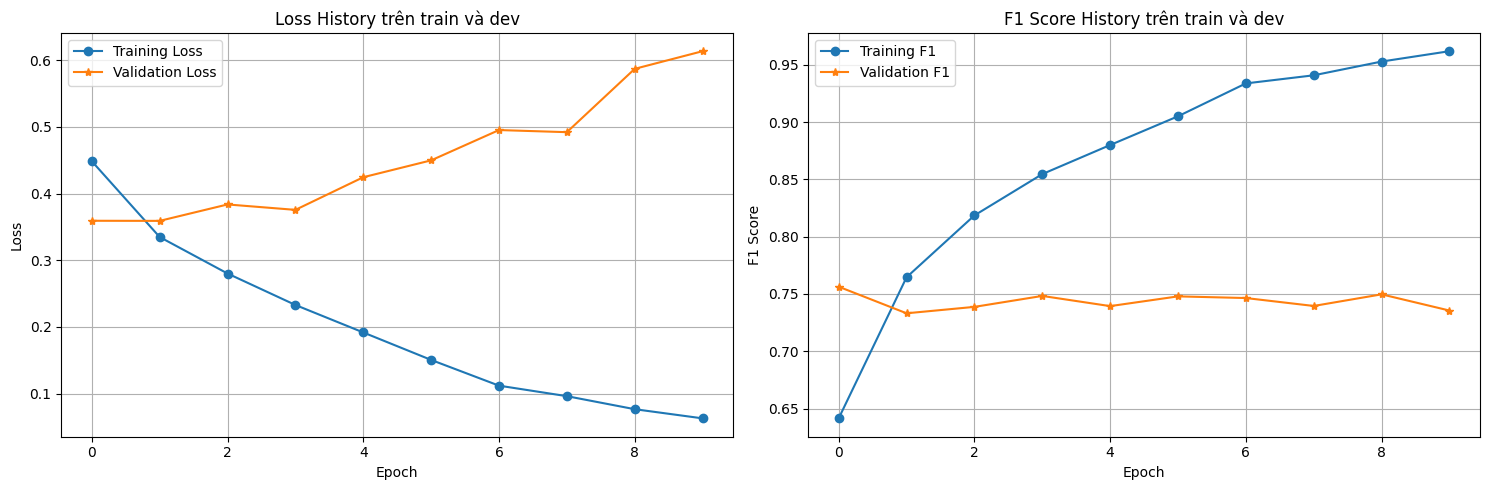

Evaluating: 100%|██████████| 99/99 [00:00<00:00, 131.32it/s]

Test Metrics:
Accuracy: 0.8658
F1 (Macro): 0.7530
Precision: 0.7578
Recall: 0.7484


<Figure size 640x480 with 0 Axes>

In [3]:
%run main.py

*Nhận xét: Với config trên, mô hình có dấu hiệu overfitting trên tập train khi tập dev có loss tăng và F1-score dao động. Thay đổi config (tăng dropout) và train lại lần nữa*

CẤU HÌNH MÔ HÌNH
Device: cuda
Dropout: 0.3
Số lớp LSTM: 5
Hidden size: 256
Embedding dim: 300
Bidirectional: True
Batch size: 32
Learning rate: 0.001
Số epochs: 10
Patience: 5
Max sequence length: 128
Số classes: 4
Labels: ['training_program', 'lecturer', 'others', 'facility']

[INFO] Xây dựng vocabulary...
[INFO] Bắt đầu xây dựng vocab
[INFO] Xây dựng hoàn tất. Vocab size: 1535

[INFO] Load dataset
[INFO] Load dataset/UIT-VSFC-train.json thành công. Kích thước: 11426 
Phân bố nhãn: {'training_program': 2201, 'lecturer': 8166, 'others': 562, 'facility': 497}
[INFO] Load dataset/UIT-VSFC-dev.json thành công. Kích thước: 1583 
Phân bố nhãn: {'training_program': 267, 'lecturer': 1151, 'others': 95, 'facility': 70}
[INFO] Load dataset/UIT-VSFC-test.json thành công. Kích thước: 3166 
Phân bố nhãn: {'lecturer': 2290, 'training_program': 572, 'others': 159, 'facility': 145}

[INFO] Khởi tạo mô hình
Số tham số: 7,913,176

[INFO] Huấn luyện mô hình
---BẮT ĐẦU TRAINING---
Số epoch: 10
Batch size

Evaluating: 100%|██████████| 50/50 [00:00<00:00, 138.61it/s]


Train Loss: 0.4677 | Train F1: 0.6145
Dev Loss: 0.3800 | Dev F1: 0.6967
--------------------
Epoch 2/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 138.16it/s]


Train Loss: 0.3610 | Train F1: 0.7422
Dev Loss: 0.3359 | Dev F1: 0.7682
--------------------
Epoch 3/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 101.38it/s]


Train Loss: 0.3218 | Train F1: 0.7776
Dev Loss: 0.3383 | Dev F1: 0.7730
--------------------
Epoch 4/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 143.78it/s]


Train Loss: 0.2880 | Train F1: 0.8050
Dev Loss: 0.3458 | Dev F1: 0.7602
--------------------
Epoch 5/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 144.30it/s]


Train Loss: 0.2492 | Train F1: 0.8401
Dev Loss: 0.3712 | Dev F1: 0.7875
--------------------
Epoch 6/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 138.84it/s]


Train Loss: 0.2167 | Train F1: 0.8595
Dev Loss: 0.4156 | Dev F1: 0.7342
--------------------
Epoch 7/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 139.80it/s]


Train Loss: 0.1965 | Train F1: 0.8750
Dev Loss: 0.3987 | Dev F1: 0.7796
--------------------
Epoch 8/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 98.81it/s]


Train Loss: 0.1760 | Train F1: 0.8802
Dev Loss: 0.4245 | Dev F1: 0.7532
--------------------
Epoch 9/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 140.10it/s]


Train Loss: 0.1477 | Train F1: 0.9076
Dev Loss: 0.4398 | Dev F1: 0.7623
--------------------
Epoch 10/10


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 137.59it/s]


Train Loss: 0.1287 | Train F1: 0.9190
Dev Loss: 0.4424 | Dev F1: 0.7793
Early stopping sau 10 epochs
---HOÀN THÀNH TRAINING---
Best F1: 0.7875


<Figure size 640x480 with 0 Axes>

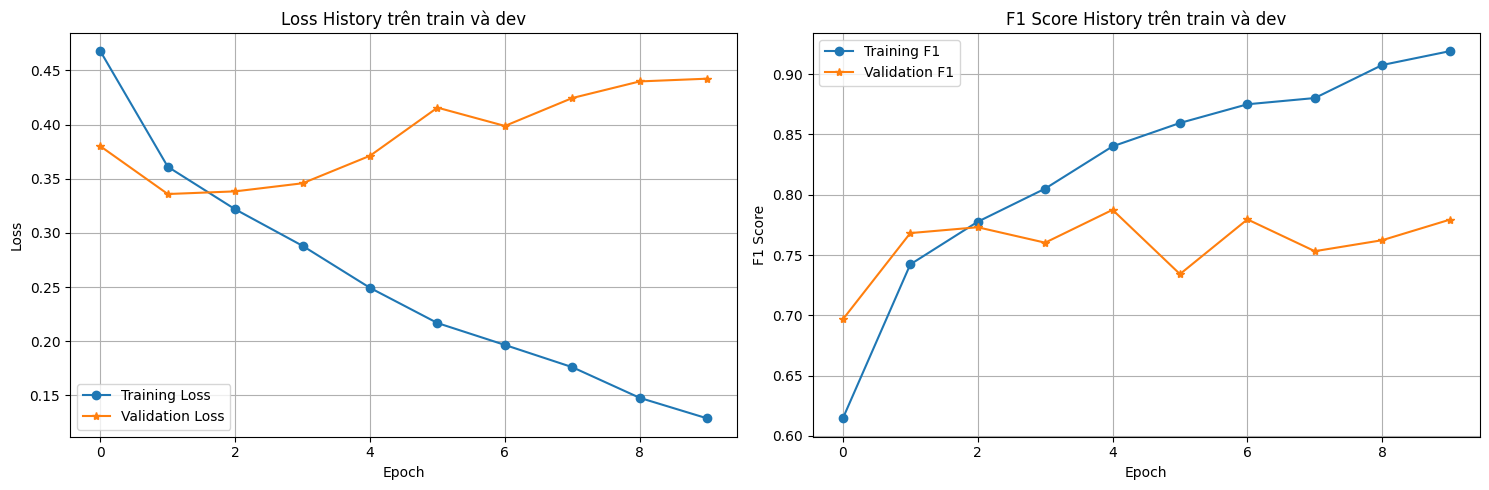


[INFO] Đánh giá trên test set


Evaluating: 100%|██████████| 99/99 [00:00<00:00, 133.17it/s]

Test Metrics:
Accuracy: 0.8699
F1 (Macro): 0.7616
Precision: 0.7649
Recall: 0.7601

Hoàn tất!


In [9]:
%run main.py --dropout 0.3 --num_epochs 10 --patience 5

### Bài 2: Xây dựng mạng GRU gồm 5 lớp với hidden size là 256 cho bài toán phân loại văn bản. Huấn luyện mô hình này trên bộ dữ liệu UIT-VSFC (Vietnamese Student Feedback Corpus) sử dụng Adam làm phương thức tối ưu tham số và đánh giá độ hiệu quả của mô hình sử dụng độ đo F1.

In [17]:
!python module_bai_2/main.py

CONFIGURATION
Model: GRU with 5 layers
Hidden size: 256 | Embedding: 300
Dropout: 0.3 | Bidirectional: True
Batch size: 32 | Learning rate: 0.001
Weight decay: 1e-05 | Epochs: 20
Scheduler: True | Patience: 5
Device: cuda

[INFO] Building vocabulary...
[INFO] Building vocabulary...
[INFO] Vocab size: 1535

[INFO] Loading datasets...
[INFO] Load dataset/UIT-VSFC-train.json: 11426 samples
Label distribution: {'training_program': 2201, 'lecturer': 8166, 'others': 562, 'facility': 497}
[INFO] Load dataset/UIT-VSFC-dev.json: 1583 samples
Label distribution: {'training_program': 267, 'lecturer': 1151, 'others': 95, 'facility': 70}
[INFO] Load dataset/UIT-VSFC-test.json: 3166 samples
Label distribution: {'lecturer': 2290, 'training_program': 572, 'others': 159, 'facility': 145}

[INFO] Initializing model...
Model parameters: 6,050,520

[INFO] Training model...

------------------------------------------------------------
TRAINING
------------------------------------------------------------
Ep

Training History Plot:


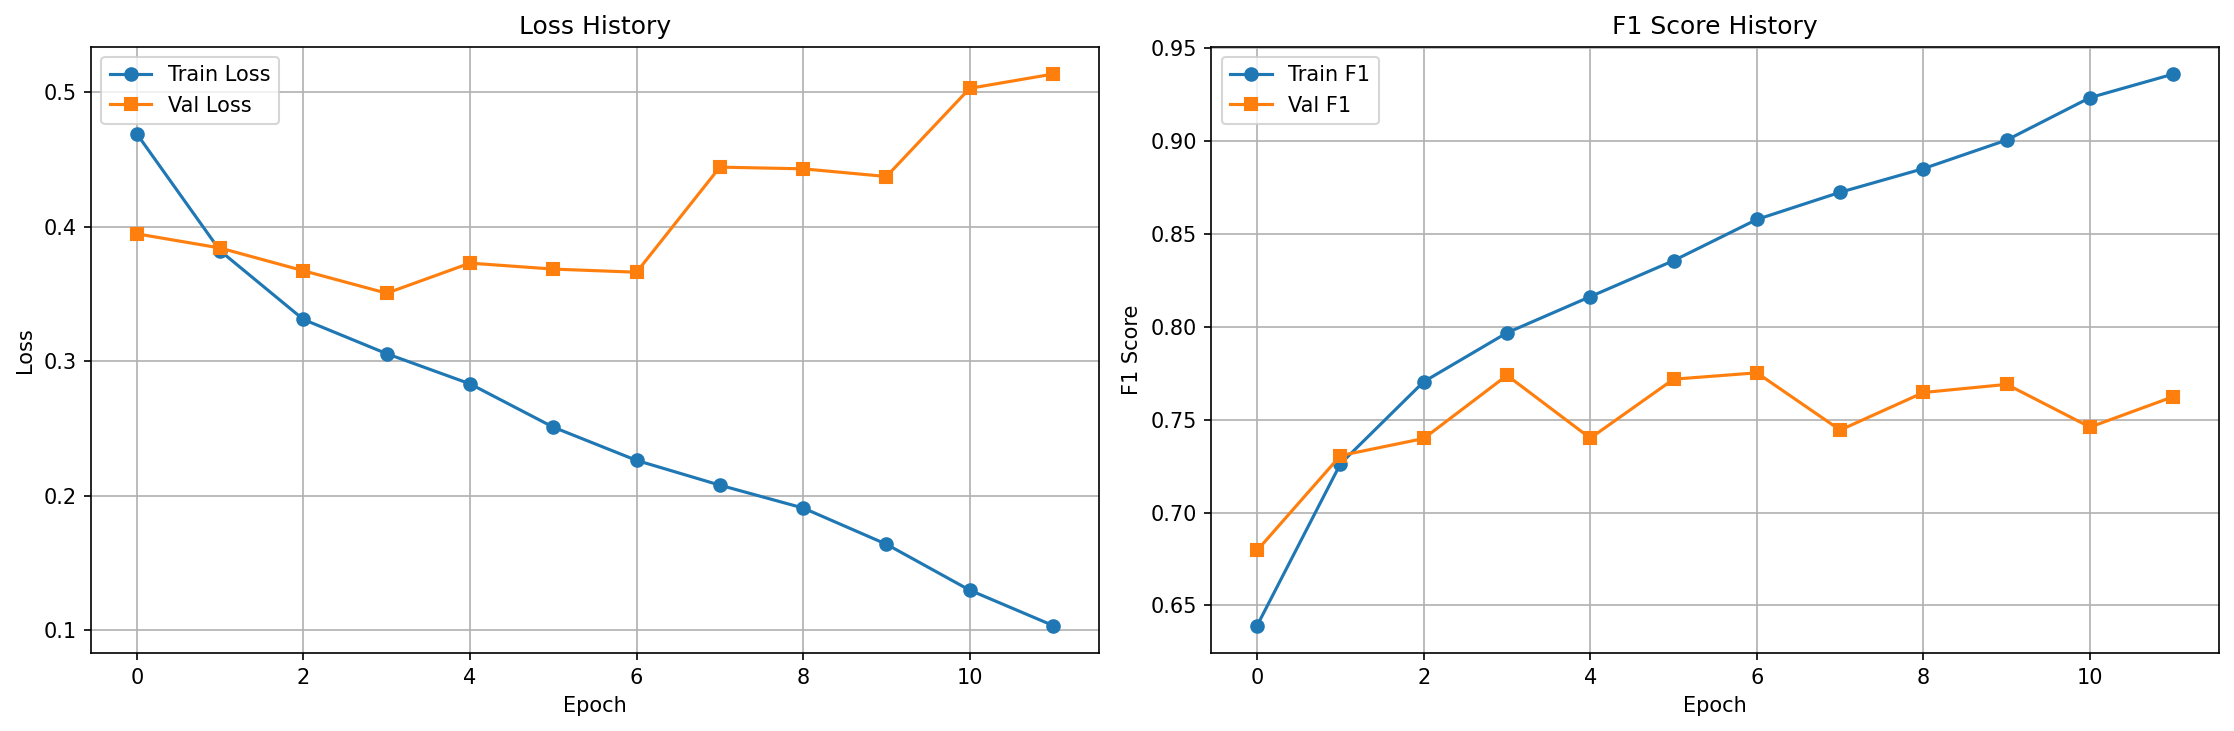


Training Summary:
  Total epochs: 12
  Best train F1: 0.9360
  Best val F1: 0.7752
  Final train loss: 0.1037
  Final val loss: 0.5136


In [19]:
%run module_bai_2/display_results.py

### Bài 3: Xây dựng kiến trúc Encoder-Decoder trong đó Encoder gồm 5 lớp LSTM và Decoder gồm 5 lớp LSTM với hidden size là 256 cho bài toán nhận diện thực thể (Name Entity Recognition). Huấn luyện mô hình trên bộ dữ liệu PhoNER và đánh giá độ hiệu quả của mô hình sử dụng độ đo F1.

In [21]:
!git clone https://github.com/VinAIResearch/PhoNER_COVID19.git

Cloning into 'PhoNER_COVID19'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 61 (delta 24), reused 41 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 3.61 MiB | 14.98 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [23]:
!python module_bai_3/main.py


CONFIGURATION
Model: Encoder-Decoder LSTM
Encoder: 5 layers | Decoder: 5 layers
Hidden size: 256 | Embedding: 300
Dropout: 0.3 | Bidirectional: True
Batch size: 16 | LR: 0.001
Weight decay: 1e-05 | Epochs: 30
Scheduler: True | Patience: 5
Device: cuda

[INFO] Building vocabulary...
[INFO] Building vocabulary...
[INFO] Vocab size: 3043

[INFO] Loading datasets...
[INFO] Loaded 5027 sentences from PhoNER_COVID19/data/word/train_word.conll
[INFO] Loaded 2000 sentences from PhoNER_COVID19/data/word/dev_word.conll
[INFO] Loaded 3000 sentences from PhoNER_COVID19/data/word/test_word.conll

[INFO] Initializing model...
Model parameters: 11,262,745

[INFO] Training model...

------------------------------------------------------------
TRAINING
------------------------------------------------------------
Epochs: 30 | Batch size: 16
Learning rate: 0.001 | Weight decay: 1e-05
------------------------------------------------------------

--------------------
Epoch 1/30
Evaluating: 100%|██████████

Training History Plot:


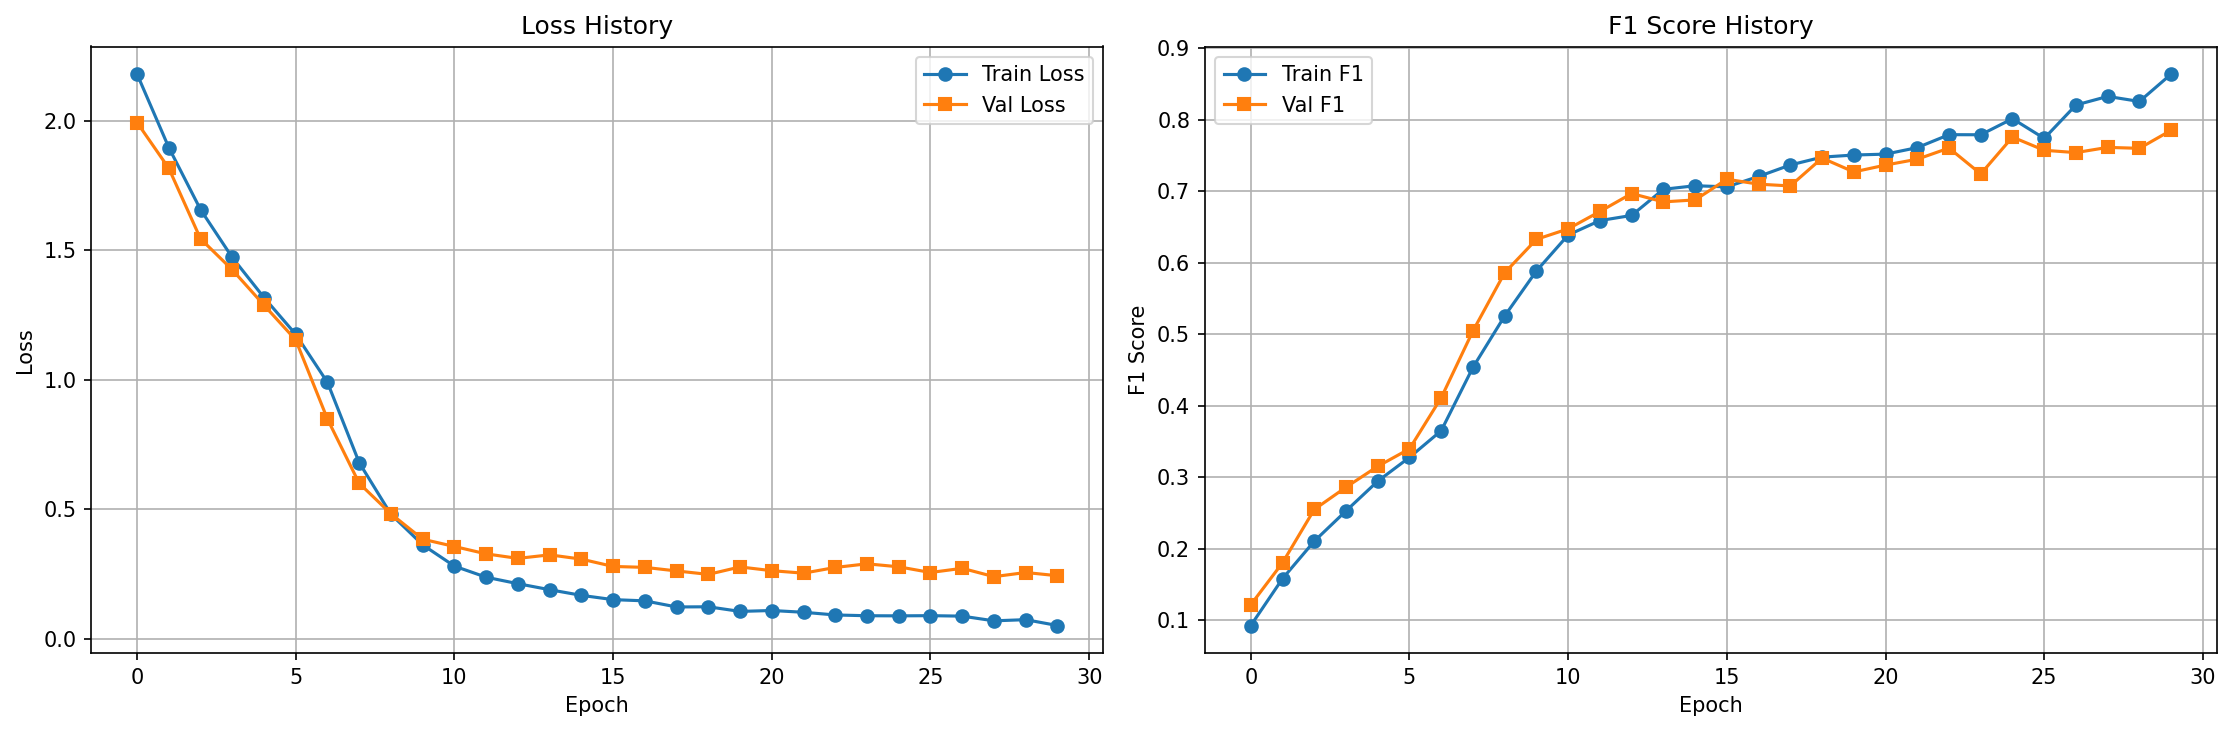


Training Summary:
  Total epochs: 30
  Best train F1: 0.8639
  Best val F1: 0.7853
  Final train loss: 0.0523
  Final val loss: 0.2444


In [26]:
%run module_bai_3/display_results.py